First 5 rows of the dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  

Number of samples for each 'MEDV' value:
MEDV
50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: count, Length: 229, dtype: int64

Checking for null values:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS     

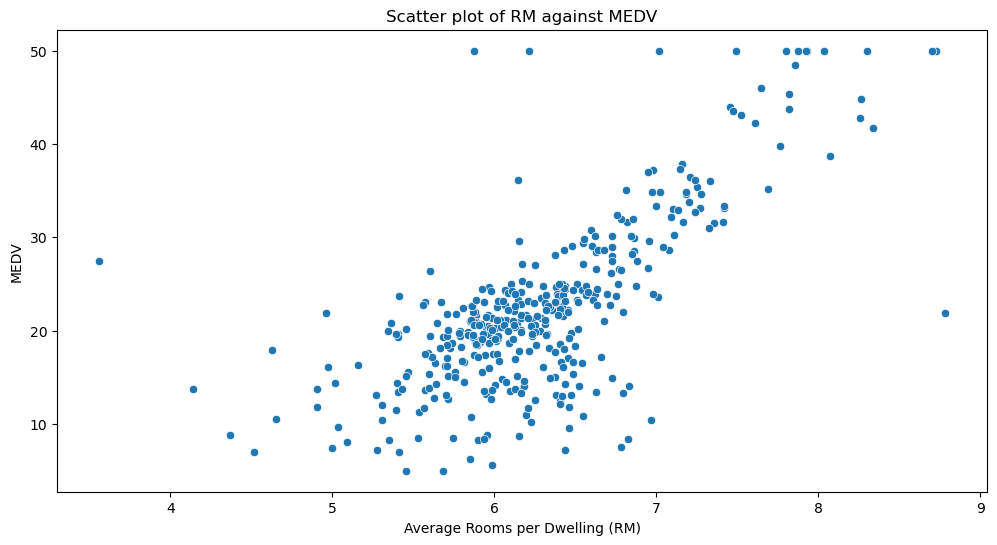


Covariance Matrix:
               CRIM           ZN       INDUS      CHAS        NOX         RM  \
CRIM      84.684581   -41.458439   24.892391 -0.120983   0.433184  -1.459147   
ZN       -41.458439   573.798067  -86.259279 -0.202132  -1.397185   5.738335   
INDUS     24.892391   -86.259279   47.725488  0.087065   0.596019  -1.943568   
CHAS      -0.120983    -0.202132    0.087065  0.063994   0.002194   0.016828   
NOX        0.433184    -1.397185    0.596019  0.002194   0.012794  -0.024993   
RM        -1.459147     5.738335   -1.943568  0.016828  -0.024993   0.487183   
AGE       87.595426  -379.567538  123.765699  0.512509   2.310843  -4.840585   
DIS       -7.049858    32.441770  -10.098643 -0.050453  -0.182336   0.320365   
RAD       48.357758   -61.788155   35.305300  0.030799   0.613441  -1.422482   
TAX      868.676743 -1232.784509  853.705174 -1.128880  12.942652 -37.659302   
PTRATIO    5.291746   -21.908442    5.922189 -0.057543   0.051514  -0.590778   
B       -317.354870 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Import dataset
df = pd.read_csv('HousingData.csv')

# 2. Display first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# 3. Check the number of samples for each 'MEDV' value
print("\nNumber of samples for each 'MEDV' value:")
print(df['MEDV'].value_counts())

# 4. Check for null values
print("\nChecking for null values:")
print(df.isnull().sum())
df = df.dropna()

# 5. Visualize the data
# Example: Scatter plot of one feature ('RM') against the target ('MEDV')
plt.figure(figsize=(12, 6))
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.title('Scatter plot of RM against MEDV')
plt.xlabel('Average Rooms per Dwelling (RM)')
plt.ylabel('MEDV')
plt.show()

# 6. Obtain covariance and correlation values
covariance_matrix = df.cov()
correlation_matrix = df.corr()

print("\nCovariance Matrix:")
print(covariance_matrix)

print("\nCorrelation Matrix:")
print(correlation_matrix)

# 7. Train and test model
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Apply regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# 9. Predictions and accuracy
y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Squared Error:", mse)
print("R-squared Score:", r2)


C:\Users\amrut\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


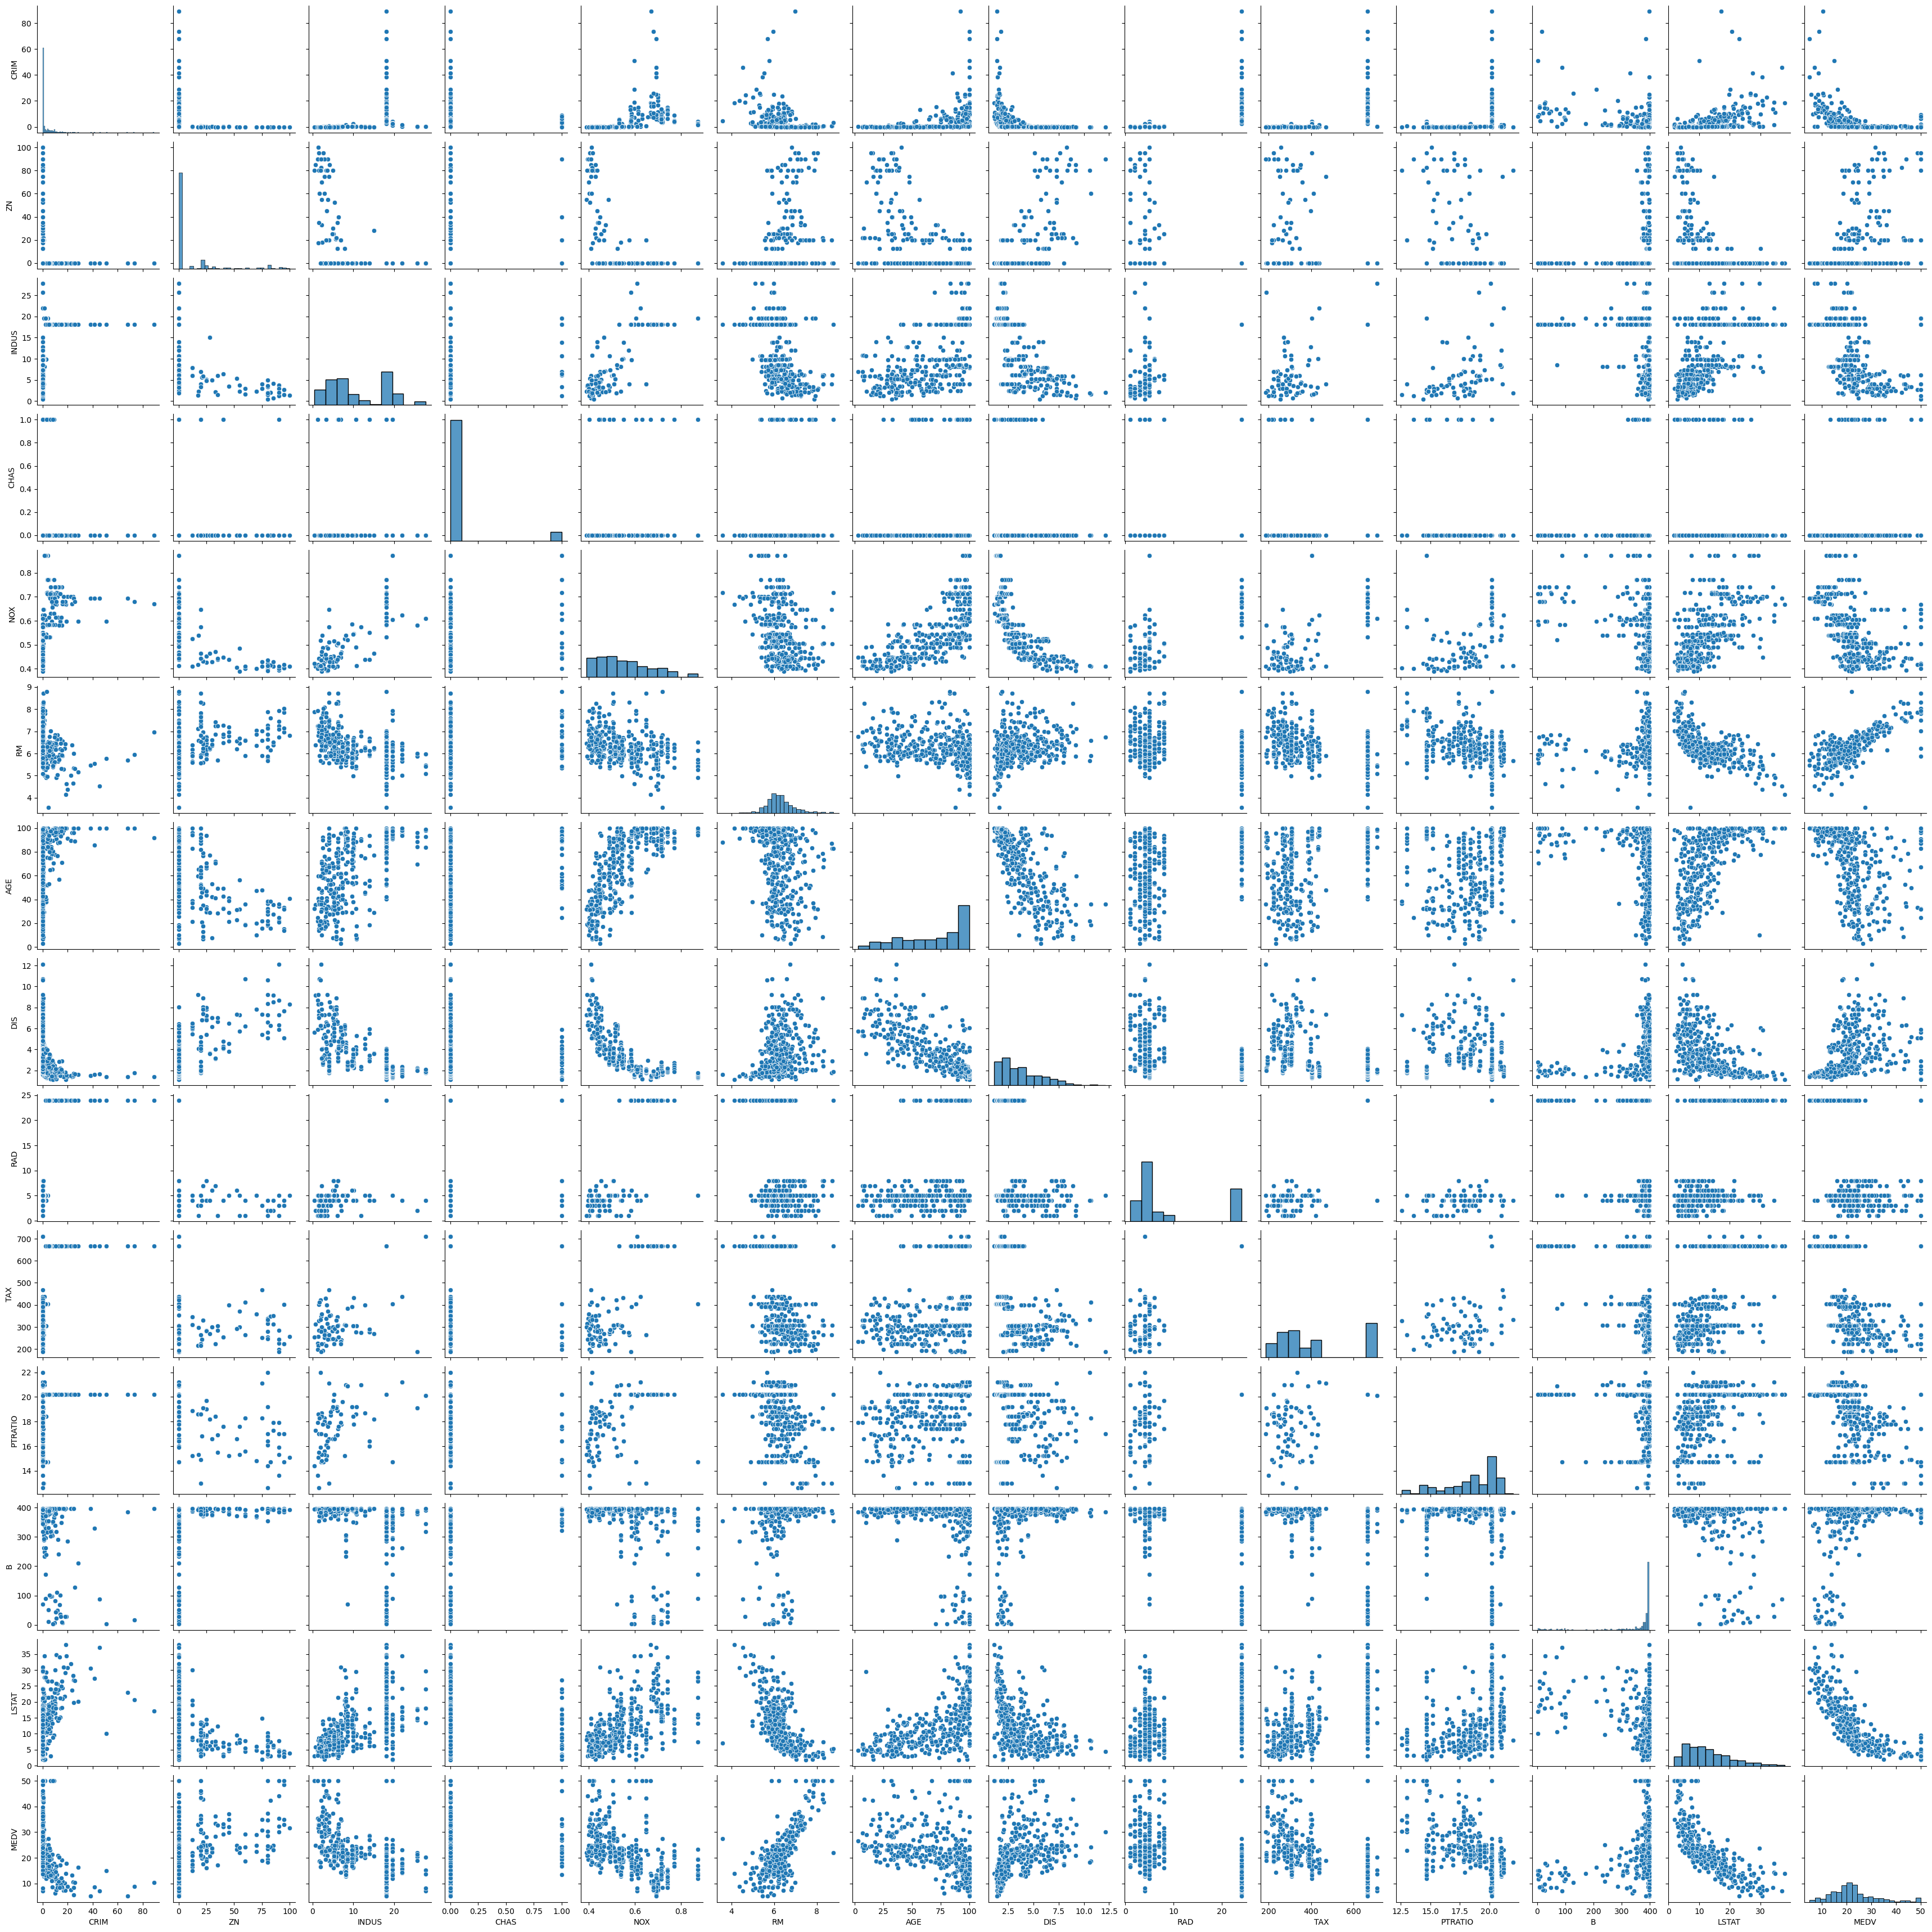

In [2]:
sns.pairplot(df)
plt.show()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [4]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean     3.690136   11.460660   11.000863    0.068528    0.553215    6.280015   
std      9.202423   23.954082    6.908364    0.252971    0.113112    0.697985   
min      0.006320    0.000000    0.460000    0.000000    0.389000    3.561000   
25%      0.081955    0.000000    5.130000    0.000000    0.453000    5.879250   
50%      0.268880    0.000000    8.560000    0.000000    0.538000    6.201500   
75%      3.435973   12.500000   18.100000    0.000000    0.624000    6.605500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean    68.932741    3.805268    9.403553  406.431472   18.537563  358.490939   
std     27.888705    2.098571    8.633451  168.312419    2.166460   89.283295   
min      2.900000    1.129600    1.000000  187.000000   12.600000    2.600000   
25%     45.475000    2.110100    4.000000  280.250000   17.400000  376.707500   
50%     77.700000    3.199200    5.000000  330.000000   19.100000  392.190000   
75%     94.250000    5.116700   24.000000  666.000000   20.200000  396.900000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  394.000000  394.000000  
mean    12.769112   22.359645  
std      7.308430    9.142979  
min      1.730000    5.000000  
25%      7.125000   16.800000  
50%     11.300000   21.050000  
75%     17.117500   25.000000  
max     37.970000   50.000000

In [5]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.5  2.3999    6  391   
500  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    6  391   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
5       18.7  394.12   5.21  28.7  
..       ...     ...    ...   ...  
499     19.2  395.77  15.10  17.5  
500     19.2  396.90  14.33  16.8  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  

[394 rows x 14 columns]

In [6]:
X = df.iloc[:,:-1]
y = df['MEDV']

C:\Users\amrut\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\amrut\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


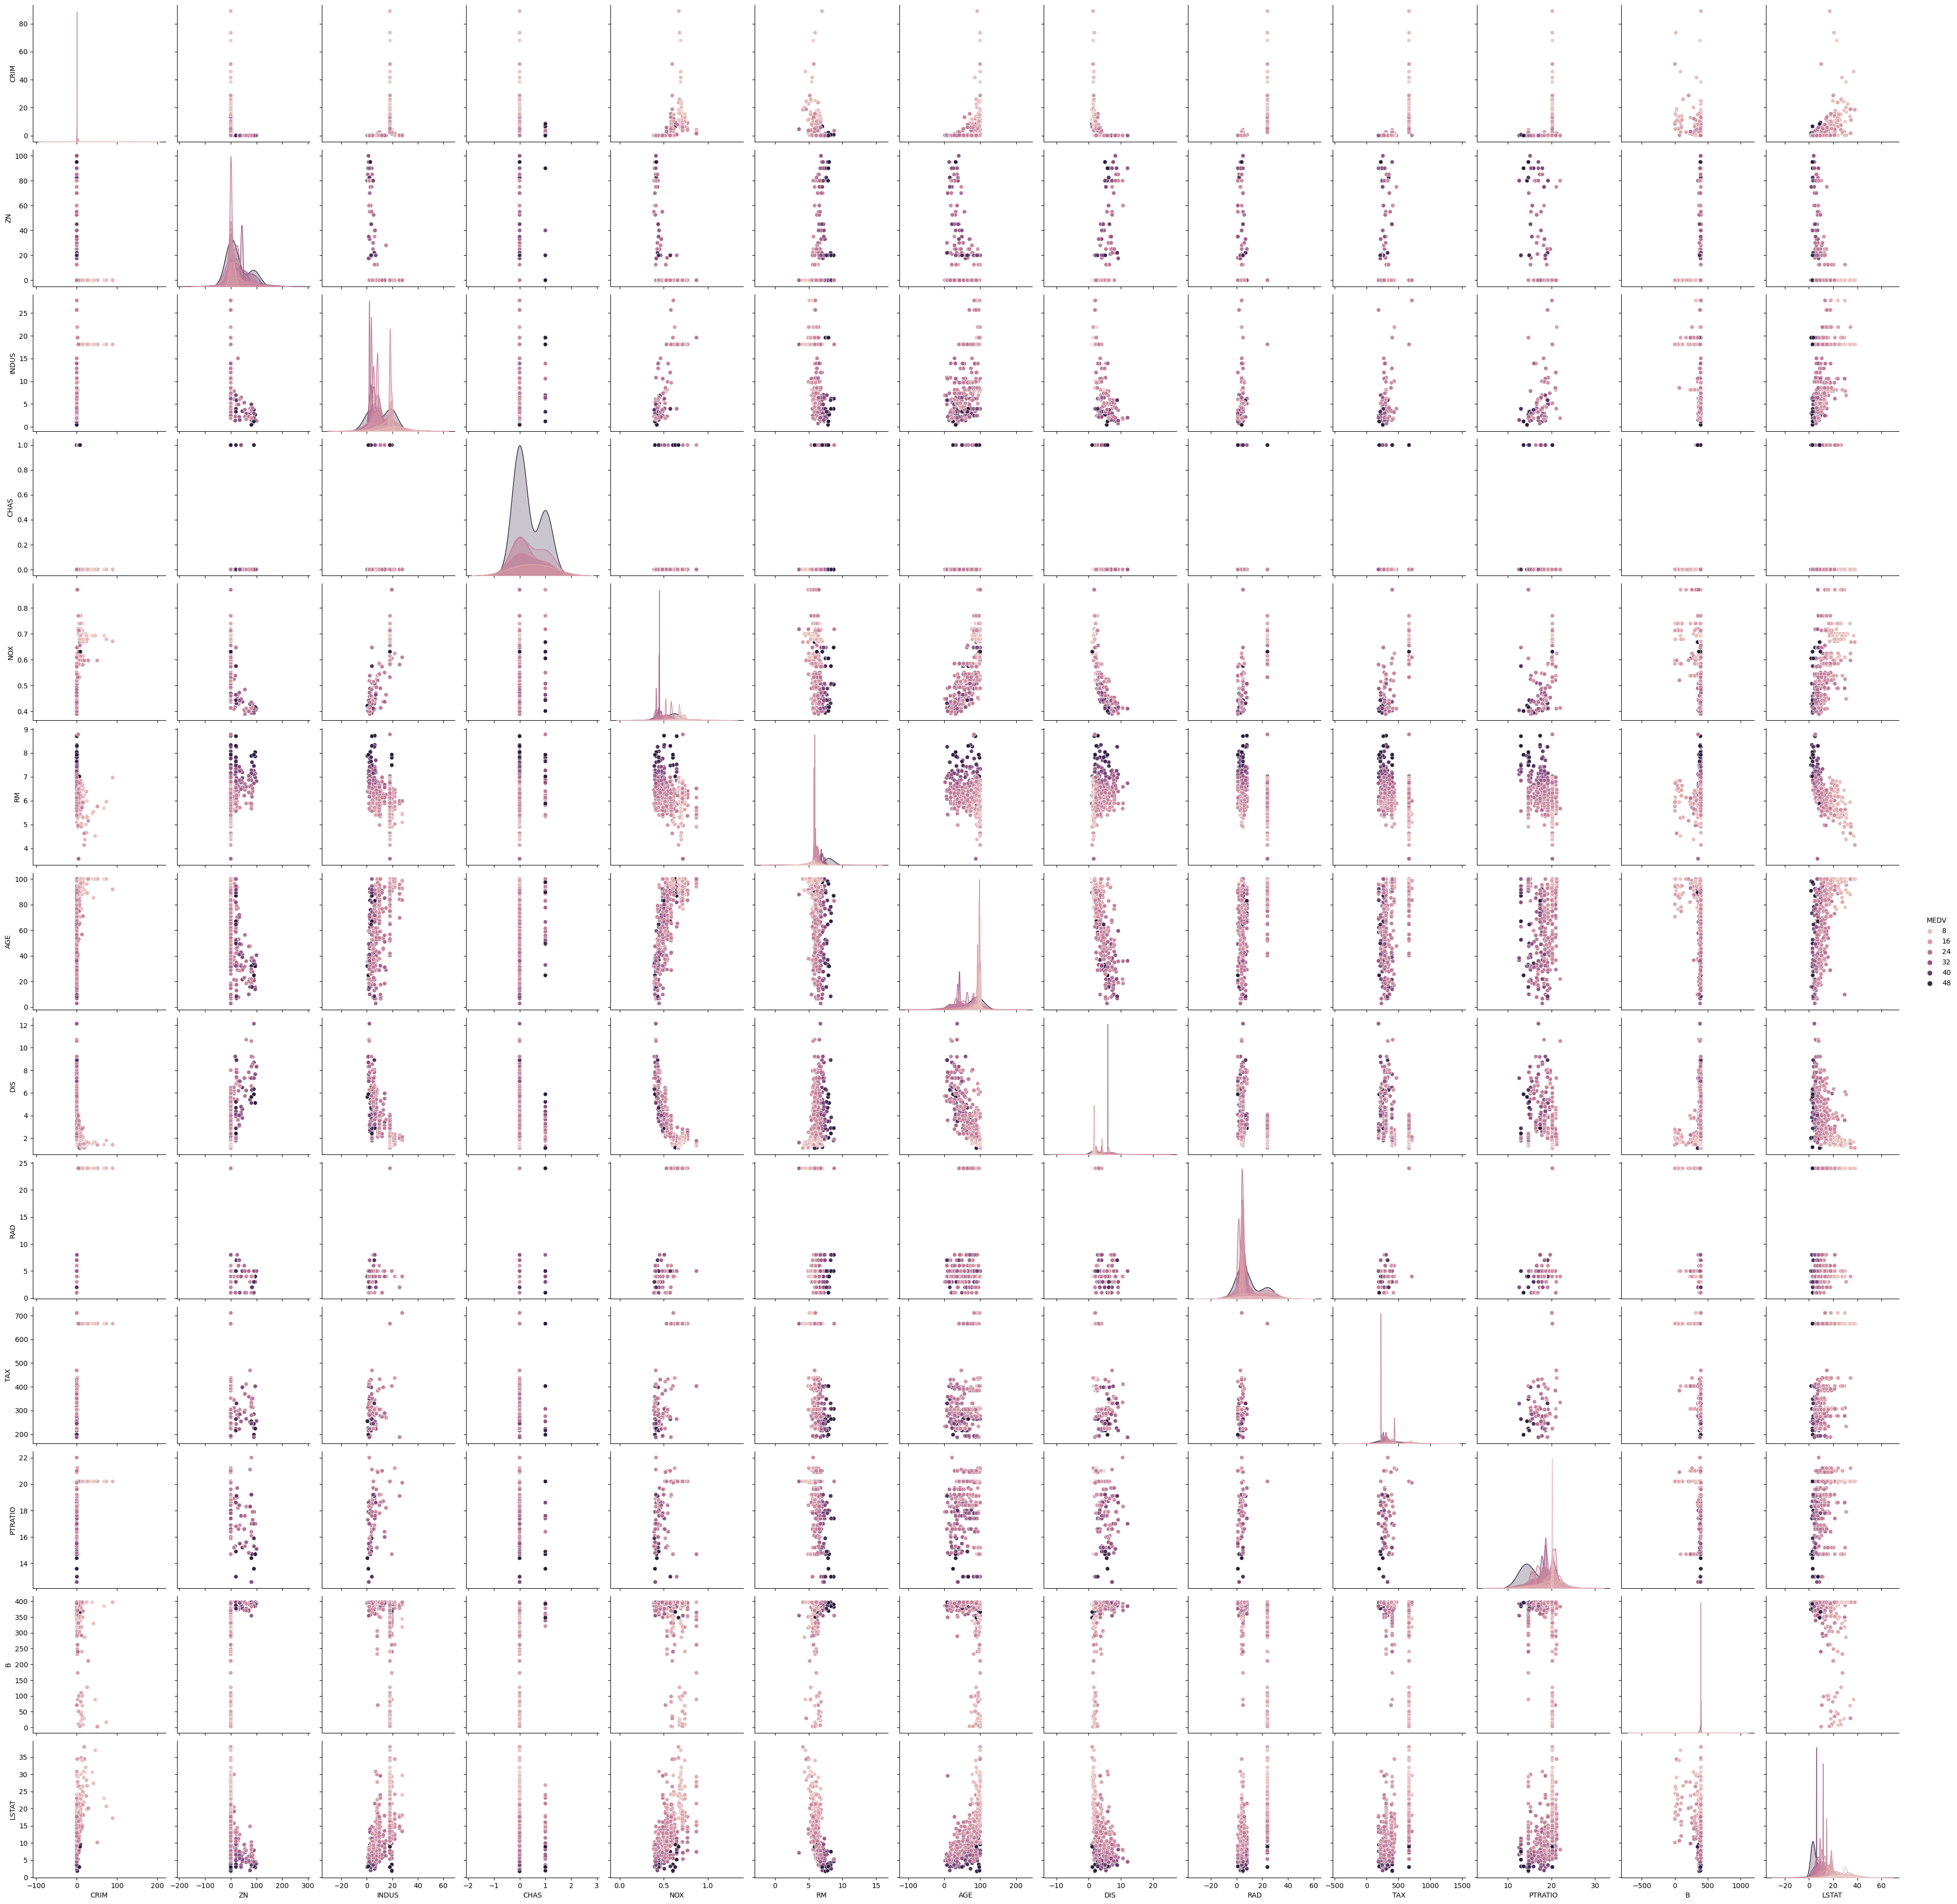

In [7]:
sns.pairplot(df, hue = 'MEDV', size = 3)
plt.show()

In [8]:
df.iloc[0:10,]

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0   0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900    1  296   
1   0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671    2  242   
2   0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671    2  242   
3   0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622    3  222   
5   0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622    3  222   
7   0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505    5  311   
8   0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821    5  311   
10  0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467    5  311   
11  0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267    5  311   
12  0.09378  12.5   7.87   0.0  0.524  5.889   39.0  5.4509    5  311   

    PTRATIO       B  LSTAT  MEDV  
0      15.3  396.90   4.98  24.0  
1      17.8  396.90   9.14  21.6  
2      17.8  392.83   4.03  34.7  
3      18.7  394.63   2.94  33.4  
5      18.7  394.12   5.21  28.7  
7      15.2  396.90  19.15  27.1  
8      15.2  386.63  29.93  16.5  
10     15.2  392.52  20.45  15.0  
11     15.2  396.90  13.27  18.9  
12     15.2  390.50  15.71  21.7